<a href="https://colab.research.google.com/github/Ojz31/House-price-predication/blob/main/house_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('/content/data.csv')
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           4600 non-null   datetime64[ns]
 1   price          4600 non-null   float64       
 2   bedrooms       4600 non-null   float64       
 3   bathrooms      4600 non-null   float64       
 4   sqft_living    4600 non-null   int64         
 5   sqft_lot       4600 non-null   int64         
 6   floors         4600 non-null   float64       
 7   waterfront     4600 non-null   int64         
 8   view           4600 non-null   int64         
 9   condition      4600 non-null   int64         
 10  sqft_above     4600 non-null   int64         
 11  sqft_basement  4600 non-null   int64         
 12  yr_built       4600 non-null   int64         
 13  yr_renovated   4600 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(9)
memory usage: 503.2 KB


In [7]:
df['country'].nunique()

1

In [9]:
df.drop('country',axis = 1,inplace = True)

In [10]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip'],
      dtype='object')

In [11]:
df['city'].nunique()

44

In [12]:
df['street'].nunique()

4525

In [13]:
df['statezip'].nunique()

77

In [14]:
df['city'].head()

,city
0,Shoreline
1,Seattle
2,Kent
3,Bellevue
4,Redmond


In [46]:
df.drop('city',axis = 1,inplace = True)
df.drop('statezip',axis = 1,inplace = True)
df.drop('street',axis = 1,inplace = True)
df.drop('date',axis = 1,inplace = True)

In [26]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated'],
      dtype='object')

In [37]:
df.isna().sum()

,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0
condition,0


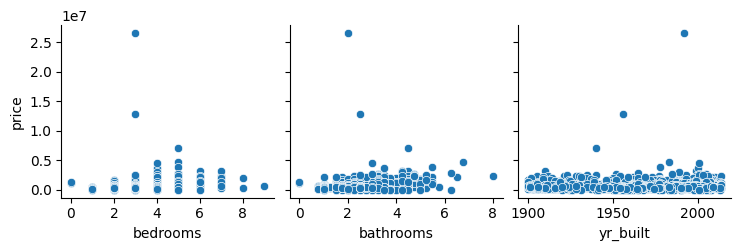

In [19]:
sns.pairplot(df, y_vars=['price'], x_vars=['bedrooms', 'bathrooms', 'yr_built'])

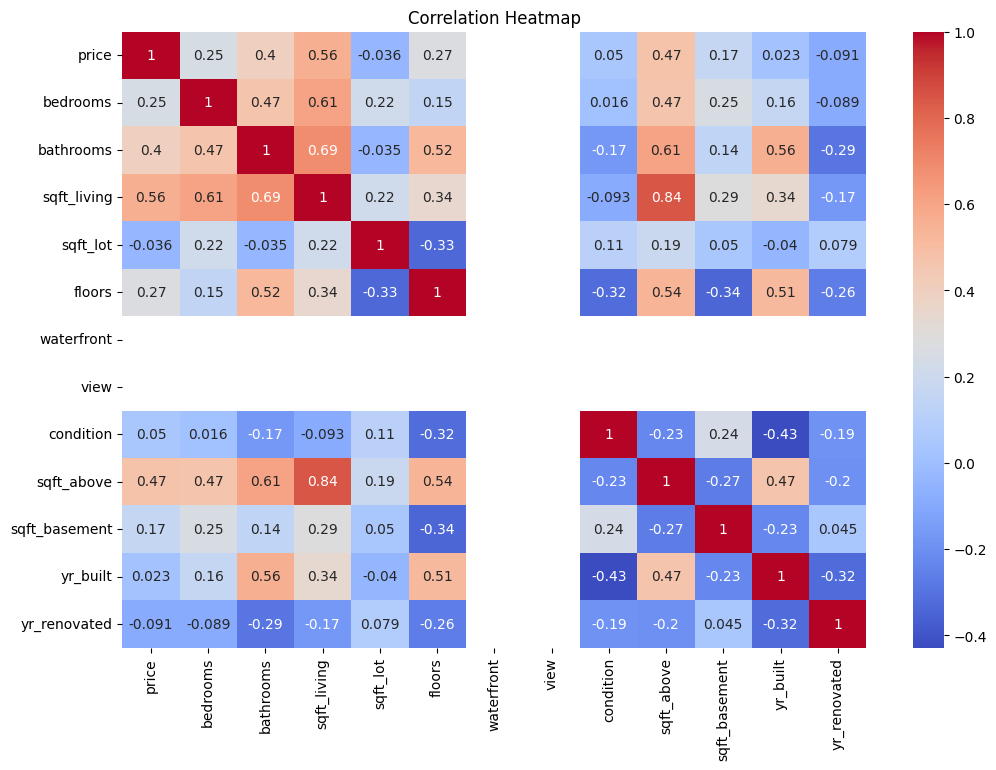

In [87]:
corr = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

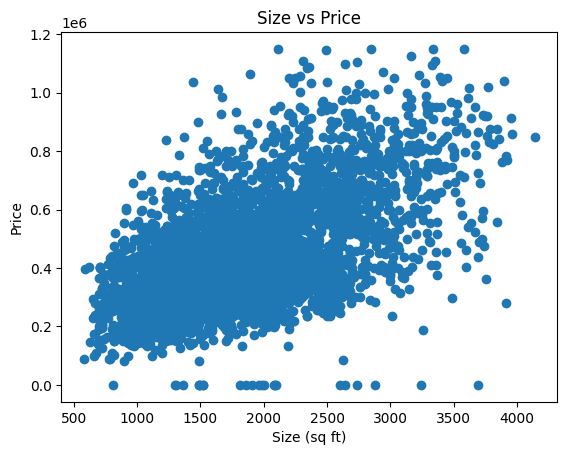

In [63]:
plt.scatter(df['sqft_living'], df['price'])
plt.title("Size vs Price")
plt.xlabel("Size (sq ft)")
plt.ylabel("Price")
plt.show()

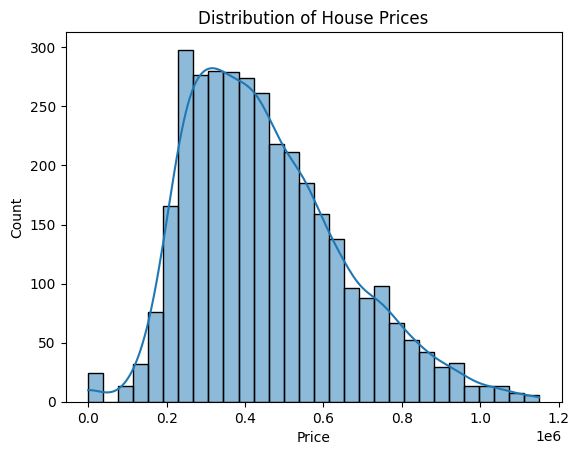

In [70]:
sns.histplot(df['price'], kde=True, bins=30)
plt.title("Distribution of House Prices")
plt.xlabel("Price")
plt.show()

In [62]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df= df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]

In [64]:
X = df.drop('price',axis =1)
y = df['price']

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [86]:
linear_reg = LinearRegression()
linear_reg.fit(X_train,y_train)
pred = linear_reg.predict(X_test)
mse = mean_squared_error(y_test, pred)
r2 = r2_score(y_test, pred)

print("Linear Regression - MSE:", mse, "R-squared:", r2)

Linear Regression - MSE: 21166139022.42114 R-squared: 0.459520377263396


In [69]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_predictions)
dt_r2 = r2_score(y_test, dt_predictions)
print("Decision Tree - MSE:", dt_mse, "R-squared:", dt_r2)

Decision Tree - MSE: 41100613076.26052 R-squared: -0.04950854882740985


In [72]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

rf_predictions = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)
print("Random Forest - MSE:", rf_mse, "R-squared:", rf_r2)

Random Forest - MSE: 20261763606.334335 R-squared: 0.4826137001968358


In [73]:
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
lasso_predictions = lasso_model.predict(X_test)

lasso_mse = mean_squared_error(y_test, lasso_predictions)
lasso_r2 = r2_score(y_test, lasso_predictions)
print("Lasso Regression - MSE:", lasso_mse, "R-squared:", lasso_r2)

Lasso Regression - MSE: 21166141874.949463 R-squared: 0.45952030442378033


In [76]:
scaler = StandardScaler()

In [77]:
normalized_data = df.copy()
numerical_cols = ['sqft_living', 'bedrooms', 'sqft_lot', 'price','sqft_above','sqft_basement','yr_built','yr_renovated']
normalized_data[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [78]:
normalized_data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,-0.711472,-0.370783,1.50,-0.817484,0.197636,1.5,0,0,3,-0.455726,-0.654392,-0.526566,1.227020
2,-0.565246,-0.370783,2.00,0.066605,1.320461,1.0,0,0,4,0.432697,-0.654392,-0.161308,-0.822246
3,-0.171949,-0.370783,2.25,0.171497,0.230472,1.0,0,0,4,-0.967699,2.039645,-0.260924,-0.822246
4,0.483545,0.910239,2.50,0.081590,0.917802,1.0,0,0,4,-0.756887,1.500838,0.170745,1.213733
5,0.181009,-1.651805,1.00,-1.506774,-0.228676,1.0,0,0,3,-1.148396,-0.654392,-1.091057,1.215777


In [79]:
X_norm = normalized_data.drop('price',axis=1)
y_norm = normalized_data['price']

In [80]:
X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(X_norm,y_norm,test_size=0.2,random_state=42)

In [85]:
linear_reg = LinearRegression()
linear_reg.fit(X_train_norm,y_train_norm)
pred = linear_reg.predict(X_test_norm)
mse = mean_squared_error(y_test_norm, pred)
r2 = r2_score(y_test_norm, pred)

print("Linear Regression - MSE:", mse, "R-squared:", r2)

Linear Regression - MSE: 0.5381375520062327 R-squared: 0.45952037726339345


In [82]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train_norm, y_train_norm)
dt_predictions = dt_model.predict(X_test_norm)
dt_mse = mean_squared_error(y_test_norm, dt_predictions)
dt_r2 = r2_score(y_test_norm, dt_predictions)
print("Decision Tree - MSE:", dt_mse, "R-squared:", dt_r2)

Decision Tree - MSE: 1.1266231509841984 R-squared: -0.13152641613684302


In [83]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model.fit(X_train_norm, y_train_norm)

rf_predictions = rf_model.predict(X_test_norm)
rf_mse = mean_squared_error(y_test_norm, rf_predictions)
rf_r2 = r2_score(y_test_norm, rf_predictions)
print("Random Forest - MSE:", rf_mse, "R-squared:", rf_r2)

Random Forest - MSE: 0.5153033373544769 R-squared: 0.48245397049519356


In [84]:
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train_norm, y_train_norm)
lasso_predictions = lasso_model.predict(X_test_norm)

lasso_mse = mean_squared_error(y_test_norm, lasso_predictions)
lasso_r2 = r2_score(y_test_norm, lasso_predictions)
print("Lasso Regression - MSE:", lasso_mse, "R-squared:", lasso_r2)

Lasso Regression - MSE: 0.6493677365938747 R-squared: 0.3478060990482289
